# Label regression on binary-class hand-written digits dataset

In this notebook, we explain how to apply `GPXRegressor` to hand-written digits dataset.
Since `GPXRegressor` cannot treat classification problems directly, we convert the 10-class digits dataset into 2-class dataset whose samples have any of +1 or -1 labels.
Then, we directly regress the values of the labels with `GPXRegressor`.
Such approach is called *label regression*. 

## Data preprocessing, training and evaluation

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from gpx import GPXRegressor

# Load data
X, y_cls = load_digits(return_X_y=True)
X = minmax_scale(X, axis=1)
y = np.where(y_cls >= 5, 1.0, -1.0).astype(float)
X_tr, X_te, y_tr, y_te, y_cls_tr, y_cls_te = train_test_split(X, y, y_cls, test_size=0.2, random_state=0)
Z_tr, Z_te = X_tr, X_te

# Training and test
model = GPXRegressor(verbose=False).fit(X_tr, y_tr, Z_tr)
y_mean, y_cov, w_mean, w_cov = model.predict(X_te, Z_te, return_weights=True)
mse = mean_squared_error(y_te, y_mean)
print("Test MSE = {}".format(mse))

Test MSE = 0.058355155218766004


## Visualization of weights

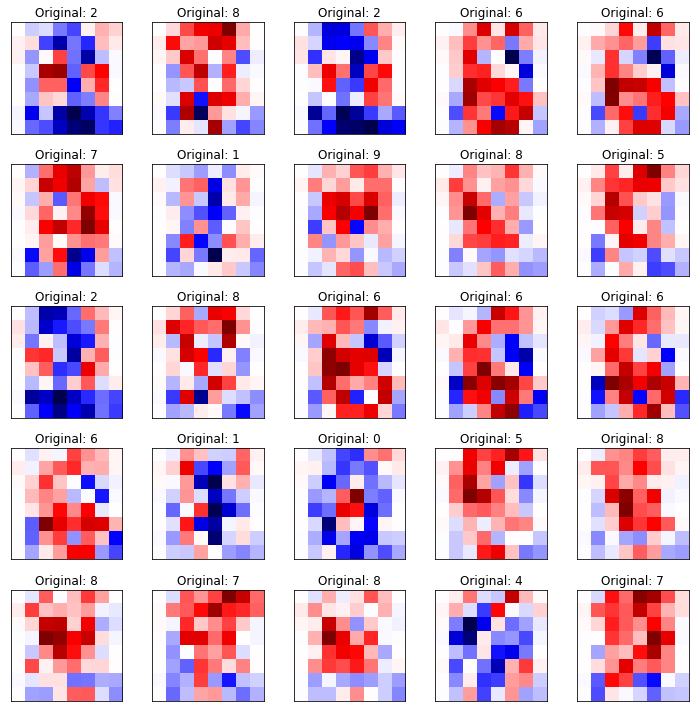

In [2]:
from itertools import product
import matplotlib.pyplot as plt

def visualize(X, w_pred, y_cls, nrows=5, ncols=5):
    fig, axs = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(nrows*2, ncols*2),
        subplot_kw={"xticks": [], "yticks": []})

    for i, (row, col) in enumerate(product(range(nrows), range(ncols))):
        w_2d = w_pred[i].reshape(8, 8)
        scale = np.abs(w_pred[i]).max()
        axs[row, col].imshow(w_2d, cmap="seismic", vmin=-scale, vmax=scale)
        axs[row, col].set_title("Original: {}".format(y_cls[i]))
    
    plt.tight_layout()
    plt.show()

visualize(Z_te, w_mean, y_cls_te)